# Regression on LT Finance Holdings Ltd Stock Price Dataset

## Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset by reading csv file
df = pd.read_csv('LT_Finance_Holdings_Ltd_Stock_Price_2017_to_2020.csv')
# Remove 'Date' column from the dataset
df = df.drop(columns=['Date'])
# Show top 5 rows of the dataset
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,111.5,114.55,111.45,114.15,113.444247,507614,3232,57585888,153199,30.18,3.10,2.65
1,109.8,113.45,108.25,111.05,110.885149,582592,5341,64600801,178957,30.72,5.20,1.25
2,118.6,118.60,108.20,109.80,114.901732,1444455,8277,165970382,832497,57.63,10.40,-8.80
3,118.0,118.65,114.90,117.15,116.925833,364544,2107,42624611,49561,13.60,3.75,-0.85
4,120.7,120.70,115.70,117.05,117.717349,1136917,7191,133834855,759176,66.77,5.00,-3.65


In [2]:
# Statistical summary for numerical columns
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,744.000000,744.000000,744.000000,744.000000,744.000000,7.440000e+02,744.000000,7.440000e+02,7.440000e+02,744.000000,744.000000,744.000000
mean,143.307661,145.615927,140.714516,143.005175,143.180103,7.526360e+05,3924.528226,1.053296e+08,2.042855e+05,26.887648,4.901411,-0.302487
std,30.167874,30.490160,29.968777,30.166167,30.229996,7.593135e+05,2870.452860,1.179880e+08,3.806967e+05,11.655862,2.598925,3.247310
min,79.700000,82.100000,78.600000,80.200000,80.284178,9.586600e+04,900.000000,8.593931e+06,2.823400e+04,1.680000,1.250000,-16.250000
25%,120.875000,122.775000,118.912500,120.700000,120.800636,3.696748e+05,2200.000000,5.173813e+07,9.153000e+04,19.297500,3.200000,-2.050000
50%,141.450000,143.800000,138.275000,140.850000,140.934889,5.576380e+05,3040.000000,7.777949e+07,1.312950e+05,25.305000,4.300000,-0.375000
75%,168.000000,170.350000,165.012500,167.712500,167.867431,8.742610e+05,4661.500000,1.172144e+08,1.999035e+05,32.120000,5.950000,1.662500
max,212.500000,213.600000,208.600000,211.100000,211.239578,1.234311e+07,31813.000000,2.242871e+09,5.713213e+06,94.120000,29.250000,12.750000


In [3]:
# Check for index, datatype and memory information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open Price                 744 non-null    float64
 1   High Price                 744 non-null    float64
 2   Low Price                  744 non-null    float64
 3   Close Price                744 non-null    float64
 4   WAP                        744 non-null    float64
 5   No.of Shares               744 non-null    int64  
 6   No. of Trades              744 non-null    int64  
 7   Total Turnover (Rs.)       744 non-null    int64  
 8   Deliverable Quantity       744 non-null    int64  
 9   % Deli. Qty to Traded Qty  744 non-null    float64
 10  Spread High-Low            744 non-null    float64
 11  Spread Close-Open          744 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 69.9 KB


As mentioned in the README, empty values were found in the row of 31-Aug-17. From the above information, we can now confirm that there is no empty value across all 744 rows of data after the empty cell is filled.

## Data Pre-Processing

After the “Date” column excluded from the dataset, the attribute names are the second item to be pre-processed by eliminating the space and dot symbol, and replacing it with the underscore symbol. This step is to ensure that the name of columns would not affect the code function.

In [4]:
# Remove warning messages
import warnings
warnings.filterwarnings('ignore')

# Remove space and dot from column name
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('.', '')
df.head()

,Open_Price,High_Price,Low_Price,Close_Price,WAP,Noof_Shares,No_of_Trades,Total_Turnover_(Rs),Deliverable_Quantity,%_Deli_Qty_to_Traded_Qty,Spread_High-Low,Spread_Close-Open
0,111.5,114.55,111.45,114.15,113.444247,507614,3232,57585888,153199,30.18,3.10,2.65
1,109.8,113.45,108.25,111.05,110.885149,582592,5341,64600801,178957,30.72,5.20,1.25
2,118.6,118.60,108.20,109.80,114.901732,1444455,8277,165970382,832497,57.63,10.40,-8.80
3,118.0,118.65,114.90,117.15,116.925833,364544,2107,42624611,49561,13.60,3.75,-0.85
4,120.7,120.70,115.70,117.05,117.717349,1136917,7191,133834855,759176,66.77,5.00,-3.65


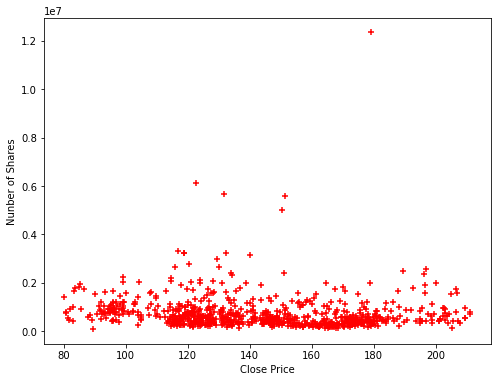

In [5]:
# Scatter plot of Number of Shares vs Close Price
plt.figure(figsize=(8,6))
plt.xlabel('Close Price')
plt.ylabel('Nunber of Shares')
plt.scatter(df.Close_Price, df.Noof_Shares, color='red', marker = '+')
plt.show()

A scatter plot of close price versus the number of shares is plotted as shown in the figure above. It is shown that the number of shares mostly spread within the range of 0 to 2,000,000 across all close price ranges. There is no clear sign of relationship between number of shares and close price.

In [6]:
# Train-test set split for complete dataset
from sklearn.model_selection import train_test_split as tts

features = df.drop(['Noof_Shares'],axis=1)
target = df['Noof_Shares']

x_train, x_test, y_train, y_test = tts(features, target, test_size = 0.2, random_state=0)

Now the data is split into train and test sets with “No. of Shares” as the target column. The test set is set at 20% of the dataset and a random state number is set so that the split is reproducible.

In [7]:
# Correlation coefficient
x = pd.concat([x_train,y_train], axis = 1)
cor = x.corr()
cor

,Open_Price,High_Price,Low_Price,Close_Price,WAP,No_of_Trades,Total_Turnover_(Rs),Deliverable_Quantity,%_Deli_Qty_to_Traded_Qty,Spread_High-Low,Spread_Close-Open,Noof_Shares
Open_Price,1.000000,0.997463,0.996844,0.994104,0.996770,-0.020045,0.125210,-0.005126,0.196898,0.237336,-0.040228,-0.088260
High_Price,0.997463,1.000000,0.996961,0.997737,0.998974,0.005413,0.140191,0.001195,0.189358,0.267856,0.016591,-0.071438
Low_Price,0.996844,0.996961,1.000000,0.997897,0.999055,-0.043647,0.113101,-0.010848,0.200198,0.191983,0.023754,-0.101944
Close_Price,0.994104,0.997737,0.997897,1.000000,0.999083,-0.017162,0.127338,-0.004986,0.191351,0.227775,0.068348,-0.085570
WAP,0.996770,0.998974,0.999055,0.999083,1.000000,-0.017804,0.127515,-0.005220,0.194193,0.229029,0.035365,-0.086070
No_of_Trades,-0.020045,0.005413,-0.043647,-0.017162,-0.017804,1.000000,0.741946,0.342541,-0.149457,0.607974,0.026286,0.761252
Total_Turnover_(Rs),0.125210,0.140191,0.113101,0.127338,0.127515,0.741946,1.000000,0.660269,0.035635,0.367302,0.021374,0.960505
Deliverable_Quantity,-0.005126,0.001195,-0.010848,-0.004986,-0.005220,0.342541,0.660269,1.000000,0.486576,0.149204,0.001211,0.706131
%_Deli_Qty_to_Traded_Qty,0.196898,0.189358,0.200198,0.191351,0.194193,-0.149457,0.035635,0.486576,1.000000,-0.090456,-0.048343,0.002333
Spread_High-Low,0.237336,0.267856,0.191983,0.227775,0.229029,0.607974,0.367302,0.149204,-0.090456,1.000000,-0.084761,0.360813


<AxesSubplot:>

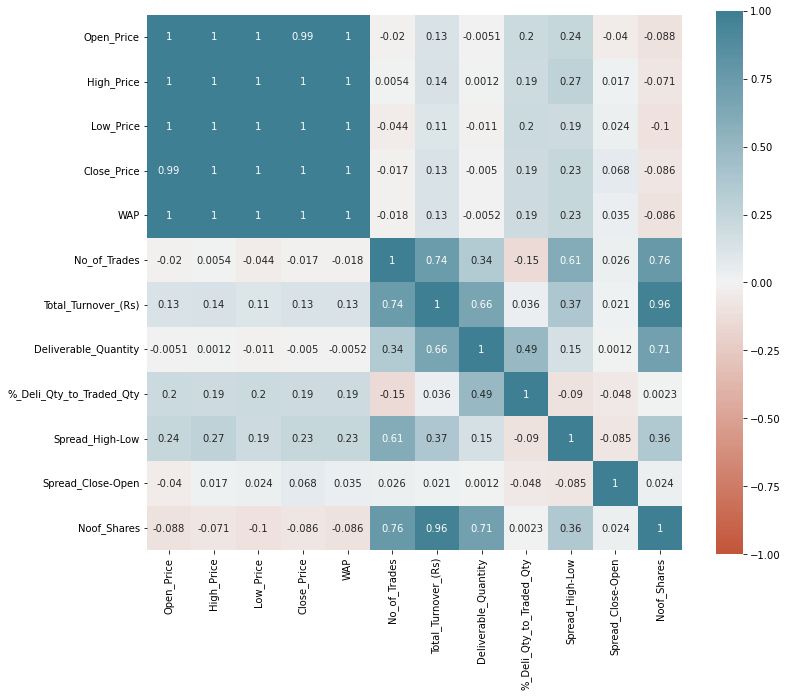

In [8]:
# Correlation coefficient heatmap
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(cor, vmin=-1, vmax=1, center=0,
           cmap = sns.diverging_palette(20, 220, n=200),
           square=True,
           annot=True)

Before proceeding to data modelling, we would like to know which attributes have a high correlation with the target – Number of Shares. The correlation coefficient is done on the train set and it is found that “Number of Trades”, “Total Turnover (Rs.)”, and “Deliverable Quantity” has a high positive correlation with the target as shown in the heatmap.

In [9]:
# Train-test split on high correlation attributes
features2 = df[['No_of_Trades','Total_Turnover_(Rs)','Deliverable_Quantity']]
target2 = df['Noof_Shares']

x2_train, x2_test, y2_train, y2_test = tts(features2, target2, test_size = 0.2, random_state = 0)

Another data split is done only with the mentioned attributes to compare the performance of modelling with the complete dataset.

## Model Training

2 types of modelling shall be done on the dataset, namely linear and non-linear modelling. LinearRegressor is used for the linear modelling while KNeighborsRegressor is used for the non-linear modelling. The performance of the model is determined using MAE, MSE, RMSE and R-Squared. A density plot shall be produced to check if the predicted value follows the actual value distribution.

A similar process goes to non-linear modelling with a little tweak on parameter tuning. CVGridSearch is applied to search for the best parameter set for non-linear model training. Value of k, distance type, and weights are the parameters pending to be tuned.

### (1) Full Dataset

#### Linear Model

In [10]:
# Linear model
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
reg_pred = reg.predict(x_test)

In [11]:
# Evaluation metrics for performance evaluation
import sklearn.metrics as metrics
import numpy as np

mae = metrics.mean_absolute_error(y_test, reg_pred)
mse = metrics.mean_squared_error(y_test, reg_pred)
rmse = metrics.mean_squared_error(y_test, reg_pred, squared = False)
r2 = metrics.r2_score(y_test, reg_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 67528.18087809508
MSE: 8025827941.413602
RMSE: 89586.98533500054
R-Squared: 0.9789727235102781


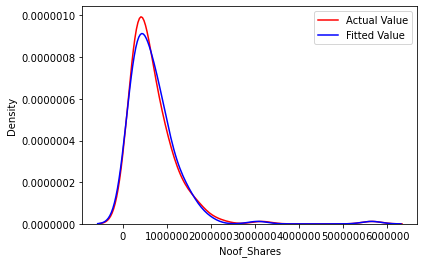

In [12]:
%matplotlib inline
# Remove warning messages
warnings.filterwarnings('ignore')
# Model fitting plot
ax1 = sns.distplot(y_test, hist=False, color='r', label = 'Actual Value')
sns.distplot(reg_pred, hist=False, color='b', label = 'Fitted Value', ax=ax1)
ax1.ticklabel_format(style='plain')
plt.legend(loc='best')
plt.show()

#### Non-Linear Model

In [13]:
# Searching for the best parameter set
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV as gsc

param_grid = {'n_neighbors':[1,3,5,7,9,11], 
              'p':[1,2],
              'weights':['uniform','distance']}

knn = KNeighborsRegressor()

grid_search = gsc(knn, param_grid, cv=10)
grid_result = grid_search.fit(x_train, y_train)
print(grid_result.best_params_)

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [14]:
# Running model on the best parameters
best = KNeighborsRegressor(n_neighbors = 3, p = 1, weights = 'distance')
best.fit(x_train, y_train)
best_pred = best.predict(x_test)

In [15]:
# Evaluation metrics for performance evaluation
mae = metrics.mean_absolute_error(y_test, best_pred)
mse = metrics.mean_squared_error(y_test, best_pred)
rmse = metrics.mean_squared_error(y_test, best_pred, squared = False)
r2 = metrics.r2_score(y_test, best_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 143566.60564954628
MSE: 41168019771.44903
RMSE: 202899.0383699465
R-Squared: 0.8921418026167991


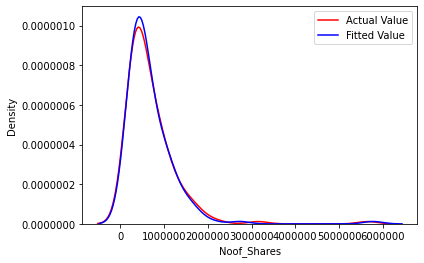

In [16]:
%matplotlib inline
# Remove warning messages
warnings.filterwarnings('ignore')
# Model fitting plot
ax1 = sns.distplot(y_test, hist=False, color='r', label = 'Actual Value')
sns.distplot(best_pred, hist=False, color='b', label = 'Fitted Value', ax=ax1)
ax1.ticklabel_format(style='plain')
plt.legend(loc='best')
plt.show()

### (2) High Correlation Attributes

#### Linear Model

In [17]:
# Linear model
reg2 = linear_model.LinearRegression()
reg2.fit(x2_train, y2_train)
reg2_pred = reg2.predict(x2_test)

In [18]:
# Evaluation metrics for performance evaluation
mae = metrics.mean_absolute_error(y2_test, reg2_pred)
mse = metrics.mean_squared_error(y2_test, reg2_pred)
rmse = metrics.mean_squared_error(y2_test, reg2_pred, squared = False)
r2 = metrics.r2_score(y2_test, reg2_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 113217.8220161115
MSE: 23027993061.17268
RMSE: 151749.7712063273
R-Squared: 0.939667784976787


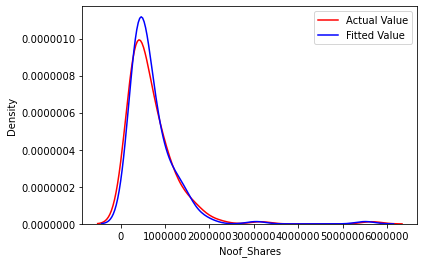

In [19]:
%matplotlib inline
# Remove warning messages
warnings.filterwarnings('ignore')
# Model fitting plot
ax1 = sns.distplot(y2_test, hist=False, color='r', label = 'Actual Value')
sns.distplot(reg2_pred, hist=False, color='b', label = 'Fitted Value', ax=ax1)
ax1.ticklabel_format(style='plain')
plt.legend(loc='best')
plt.show()

#### Non-Linear Model

In [20]:
# Searching for the best parameter set
param_grid = {'n_neighbors':[1,3,5,7,9,11], 
              'p':[1,2],
              'weights':['uniform','distance']}

knn = KNeighborsRegressor()

grid_search2 = gsc(knn, param_grid, cv=10)
grid_result2 = grid_search2.fit(x2_train, y2_train)
print(grid_result2.best_params_)

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [21]:
# Running model on the best parameters
best2 = KNeighborsRegressor(n_neighbors = 3, p = 1, weights = 'distance')
best2.fit(x2_train, y2_train)
best2_pred = best2.predict(x2_test)

In [22]:
# Evaluation metrics for performance evaluation
mae = metrics.mean_absolute_error(y2_test, best2_pred)
mse = metrics.mean_squared_error(y2_test, best2_pred)
rmse = metrics.mean_squared_error(y2_test, best2_pred, squared = False)
r2 = metrics.r2_score(y2_test, best2_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 143608.13520772525
MSE: 41185510022.3541
RMSE: 202942.13466491897
R-Squared: 0.8920959790152542


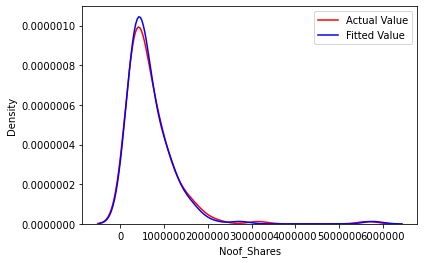

In [23]:
%matplotlib inline
# Remove warning messages
warnings.filterwarnings('ignore')
# Model fitting plot
ax1 = sns.distplot(y2_test, hist=False, color='r', label = 'Actual Value')
sns.distplot(best2_pred, hist=False, color='b', label = 'Fitted Value', ax=ax1)
ax1.ticklabel_format(style='plain')
plt.legend(loc='best')
plt.show()